# Gaussian distributions: how to recognize them, and where they come from.

### Goals:

1. To understand the basic properties of a Gaussian distribtuion (a.k.a. "Normal Distribution", a.k.a. "Bell Curve")
2. To understand the parameters of the Gaussian distribution.
3. To get an intuitive sense of why Gaussian distributions are so common in science, and what sorts of process might give rise to Gaussian distributions.
4. To understand how and why Gaussian distributions are used to express statistical significance, and how to convert between Gaussian "sigma" and p-value.

### Timing

1. Try to finish this notebook in 30-35 minutes.  To do this you will not want to spend too long on the middle section where you are making Gaussian distributions in a few different ways.

### Question and Answer Template

You can go to the link below, and do "file" -> "make a copy" to make yourself a google doc that you can use to fill in the answers to the question in this weeks notebooks.

https://docs.google.com/document/d/1Sgd8d8SA93lv9McCVPVkYml5q3eHGa8DJTwjV7X0WAY/edit?usp=sharing

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

### New functions we will use in this module

| Function Name            | What it does |
| - | - |
|    rng.poisson           | generates a random integer from a "Poisson" distribution |
|    scipy.stats.norm      | Interact with a Gaussian distribution |
|    plt.annotate          | Add text to a plot |  


# Gaussian distribution, aka Normal Distribtuion, aka Bell Curve

A Gaussian distritubion is a distribution defined by:

$G(x | \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}$

Where the notation $G(x | \mu, \sigma)$ means that:

The function $G$ depends on $x$, $\mu$ and $\sigma$, but typically we provide $\mu$ and $\sigma$ to define a specific curve as a function of $x$.

$x$ is what we sometimes call the "independent variable", while $\mu$ and $\sigma$ are sometimes called "parameters".  Basically, each set of values of $\mu$ and $\sigma$ defined a different curve.


If we take $\mu = 0$ and $\sigma = 1$ then to formula simplifies somewhat:

$G(x | \mu=1, \sigma=1) = \frac{1}{1\sqrt{2\pi}}e^{-\frac{(x - 0)^2}{2*1^2}} = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$

Ok, lets write a function to compute a Gaussian

In [3]:
def gaussian(x, mu=0., sigma=1.):
    return np.exp(-((x-mu)/(np.sqrt(2)*sigma))**2)/(sigma*np.sqrt(2*np.pi))

Let's plot that.  We are going to use the equation I wrote out above, and also the 'scipy.stats.norm' function to do it and then compare the two.

In [4]:
x_vals = np.linspace(-6, 6, 601)
y_vals_check = gaussian(x_vals, mu=0, sigma=1)
# Note that the arguments have different names, and the function is called slightly differently
# i.e., you specify the parameters in the call to norm() and then the independent variable in the call to pdf()
y_vals = stats.norm(loc=0, scale=1).pdf(x_vals)

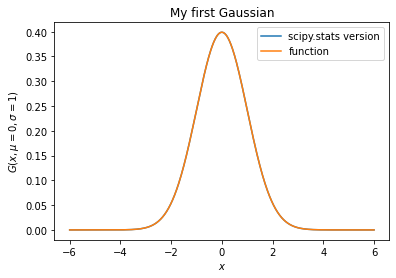

In [5]:
plt.plot(x_vals, y_vals, label="scipy.stats version")
plt.plot(x_vals, y_vals_check, label="function")
plt.legend()
plt.title("My first Gaussian")
plt.xlabel(r'$x$')
plt.ylabel(r'$G(x, \mu=0, \sigma=1)$')
plt.show()

### Properties of a Gaussian

Some properties of the gaussian we can infer just by examing the formula.

1. Since $\frac{(x-\mu)^2}{2\sigma^2}$ is always postive, and there is a minus sign in from on it, the term in the exponent is always zero or negative.  That means the maximum when that term is zero, i.e., when $x = \mu$, thus, $\mu$ gives the peak of the distribution.  
2. Since $\frac{(x - \mu)^2}{2\sigma}$ is symmetric about $\mu$, the distribution is symmetric about $\mu$.  I.e., $G(x = \mu + a, \mu, \sigma) = G(x = \mu - a, \mu, \sigma)$
3. The distribution is always positive.  I.e., $e^{-x} > 0$ for all x.
4. The distribution goes towards zero pretty quickly if $(x - \mu)^2$ is bigger than $\sigma$.  

And we can confirm those by looking at the plot. 

One thing to note:  the peak of the distribution is at $\frac{1}{\sqrt{2\pi}} \sim 0.4$.  This is to ensure that the integral of the distribution is 1.  

$\int_{-\infty}^{\infty} G(x, \mu, \sigma) = 1$


### What happens when we change the parameters?

First, lets plot a series of Gaussians with different values of $\mu$.

Then we will plot a series of Gaussians with different values of $\sigma$.

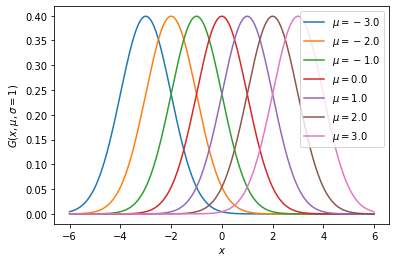

In [6]:
for mu in np.linspace(-3, 3, 7):
    plt.plot(x_vals, gaussian(x_vals, mu=mu), label=rf"$\mu = {mu:0.1f}$")

plt.xlabel(r'$x$')
plt.ylabel(r'$G(x, \mu, \sigma=1)$')
plt.legend()
plt.show()

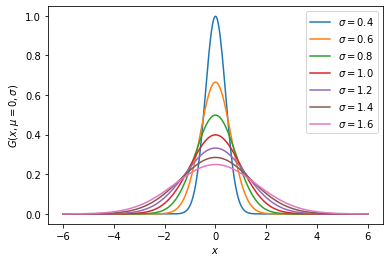

In [7]:
for sigma in np.linspace(0.4, 1.6, 7):
    plt.plot(x_vals, gaussian(x_vals, sigma=sigma), label=rf"$\sigma = {sigma:0.1f}$")

plt.xlabel(r'$x$')
plt.ylabel(r'$G(x, \mu=0, \sigma)$')
plt.legend()
plt.show()

### Questions for discussion

#### 1.1 Why do all the Gaussian in the first example have the same height, while the ones in the second example do not?  Answer both in terms of the formula, and in plain english.

#### 1.2 Specifying all three of $x$, $\mu$ and $\sigma$ gives you a single value.  Specifying only $\mu$ and $\sigma$ gives you a curve as a function of $x$.  In your own words, describe why sometimes we might want to be using the whole curve rather than a single value.  

### A comment on nomenclature / jargon:

The quantity $x$ does not occur by itself in the formula for a Gaussian, but rather in the term:

$(\frac{x - \mu}{2\sigma})^2$

Mathematically this means that we can always shift and rescale a Gaussian by setting $x' = \frac{x - \mu}{\sigma}$ so that the quantity in the exponent becomes 

$e^{-(\frac{x'}{2})^2}$

in practical terms, this means that if we can some quantity that we think is described by a Gaussian, we can subtract off the mean and divide by the standard deviation and it will now be described by a so-called "unit-Gaussian" i.e., a Gaussian with $\mu =0$ and $\sigma = 1$.

Because of this fact, there is a pretty standard jargon to refer to the x-axis of a Gaussian as though it had units of $\sigma$.  I.e., we say things like "a $3 \sigma$ outlier" all the time.  This would mean that, for that data point, $x - \mu = 3 \sigma$.


# Why a Gaussian?

### You probably don't want to spend too much time on this section in class.  It is just here to illustrate that Gaussians distributions occur from a number of different processes.

We are learning about Gaussians because they occur all the time in nature.

In short a Gaussian distribution is what you get when a lot of random effects add together.

We are going to do two different things and show that we get very Gaussian-looking distribtuions.

1.  We are going to generate 10000 sets of 12 random numbers between 0 and 1, and add each set together.  This will give use 10000 numbers between 0 and 12, and we will see that their distribution looks a lot like a Gaussian with $\mu = 6$ and $\sigma = 1$.

2.  We are going to generate 10000 numbers that simulate the "events" that we might observe in, on average, we expected to see 100 events.  "Events" could be pretty much anything that you can count: nuclear decays, detections of distance supernova, cars passing through an intersection...   This will give use 10000 that are distributed very close to a Gaussian with $\mu = 100$ and $\sigma = 10$.

3.  We are going to generate 10000 sets of 1000 random numbers between 0 and 1, and count how many numbers in each set are less than 0.1.   This will give use 10000 numbers between 0 and 1000, and we will see that their distribution looks at lot like a Gaussian with $\mu = 100$ and $\sigma = 10$.


#### A Gaussian as the sum of 12 uniformly distributed numbers between 0 and 1

In [8]:
rng = np.random.default_rng(42)

In [9]:
# This line tells numpy to generate 120000 random numbers betweeen 0 and 1
# split into 10000 groups of 12 
randomNumbers = rng.uniform(size=(10000, 12))
# This line takes the sum of each group of 12, giving us a total of 10000 numbers
sums = np.sum(randomNumbers, axis=1)
print("Some numbers are ", sums)
print(f"And we have {sums.size} numbers total")

Some numbers are  [7.26186673 7.19141012 5.38846954 ... 4.23288637 6.41376452 6.27971545]
And we have 10000 numbers total


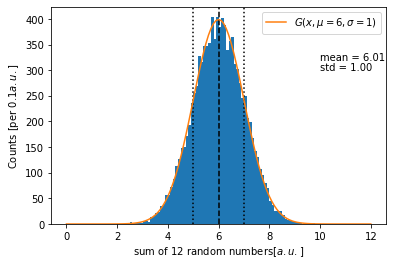

In [10]:
xvals = np.linspace(0,12,121)

# Note.  The Gaussian is defined so that it integrates to 1.  But:
#  1) We generated 10000 numbers
#  2) Our histogram bins are 0.1 units wide.  
# So, to get the height of the curve to match the histogram we need to multiply by a prefactor

plt.hist(sums, bins=xvals)
plt.axvline(x=np.mean(sums), ls='--', c='k')
plt.axvline(x=np.mean(sums)+np.std(sums), ls=':', c='k')
plt.axvline(x=np.mean(sums)-np.std(sums), ls=':', c='k')

prefactor = 10000 * 0.1
myGauss = prefactor*stats.norm(loc=6, scale=1).pdf(xvals)
plt.plot(xvals, myGauss, label=r'$G(x, \mu=6, \sigma=1)$')

plt.xlabel(r'sum of 12 random numbers[$a.u.$]')
plt.ylabel(r'Counts [per $0.1 a.u.$]')
plt.legend()
plt.annotate(f"mean = {np.mean(sums):0.2f}", (10,320))
plt.annotate(f"std = {np.std(sums):0.2f}", (10, 300))
plt.show()

### Questions for discussion

#### 2.1 Notice in the figure above that the $\mu$ and $\sigma$ of the Gaussian are very close to the mean and standard deviation of the distribution of sums.  How do you think these would change if we added together more numbers, say 24 numbers instead of 12 numbers?

#### A Gaussian as the distribution of a number of random occurences



In [11]:
# This line tells numpy to simulate 10000 trials of an expirement 
#  where on average we expect to see 100 "events" in each trial
# "Events" could be pretty much anything that you can count: 
# nuclear decays, detections of distance supernova, cars passing through an intersection.  
nEvts = rng.poisson(lam=100, size=10000)
# Then this line tells numpy to count how many numbers in each group of 1000 are less that 0.1
print(f"Some numbers are {nEvts}")
print(f"And we have {nEvts.size} numbers total")

Some numbers are [103 116  94 ...  88  98 115]
And we have 10000 numbers total


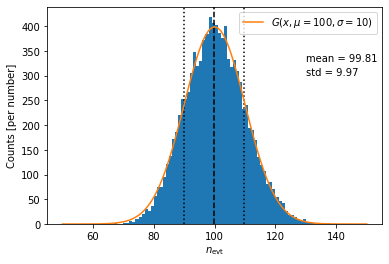

In [12]:
xvals = np.linspace(50,150,101)

plt.hist(nEvts, bins=xvals)
plt.axvline(x=np.mean(nEvts), ls='--', c='k')
plt.axvline(x=np.mean(nEvts)+np.std(nEvts), ls=':', c='k')
plt.axvline(x=np.mean(nEvts)-np.std(nEvts), ls=':', c='k')

# Note.  The Gaussian is defined so that it integrates to 1.  But:
#  1) We generated 10000 numbers
#  2) Our histogram bins are 1.0 units wide.  
# So, to get the height of the curve to match the histogram we need to multiply by 10000
myGauss = 10000*stats.norm(loc=100, scale=10).pdf(xvals)
plt.xlabel(r'$n_{\rm evt}$')
plt.ylabel(r'Counts [per number]')
plt.plot(xvals, myGauss, label=r'$G(x, \mu=100, \sigma=10)$')
plt.legend()

plt.annotate(f"mean = {np.mean(nEvts):0.2f}", (130, 330))
plt.annotate(f"std = {np.std(nEvts):0.2f}", (130, 300))
plt.show()

### Questions for discussion

#### 2.2 Notice in the figure above that the $\mu$ and $\sigma$ of the Gaussian are very close to the mean and standard deviation of the distribution of $n_{\rm evt}$.  How do you think these would change if we set a higher average number of events per trial?

#### A Gaussian as the distribution of a number of random values passing a selection

This is pretty similar to the previous example, but not quite the same.  In this case we are going to simulate 10000 gropus 

In [13]:
# This line tells numpy to simulate 10000 groups of 1000 numbers randomly distributed 
#  between 0 and 1, and select the ones that are > 0.9.
#  So, on average we expect to see 100 "passing" in each trial
nPass = np.sum((rng.uniform(size=(10000, 1000)) > 0.9), axis=1)
# Then this line tells numpy to count how many numbers in each group of 1000 are less that 0.1
print(f"Some numbers are {nPass}")
print(f"And we have {nPass.size} numbers total")

Some numbers are [ 94  84  96 ...  90 100  90]
And we have 10000 numbers total


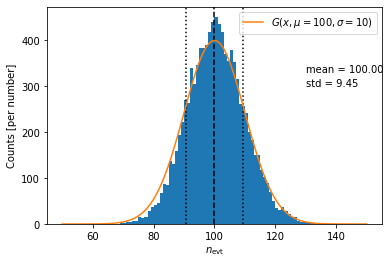

In [14]:
xvals = np.linspace(50,150,101)
plt.hist(nPass, bins=xvals)
plt.axvline(x=np.mean(nPass), ls='--', c='k')
plt.axvline(x=np.mean(nPass)+np.std(nPass), ls=':', c='k')
plt.axvline(x=np.mean(nPass)-np.std(nPass), ls=':', c='k')
# Note.  The Gaussian is defined so that it integrates to 1.  But:
#  1) We generated 10000 numbers
#  2) Our histogram bins are 1.0 units wide.  
# So, to get the height of the curve to match the histogram we need to multiply by 10000
myGauss = 10000*stats.norm(loc=100, scale=10).pdf(xvals)
plt.xlabel(r'$n_{\rm evt}$')
plt.ylabel(r'Counts [per number]')
plt.plot(xvals, myGauss, label=r'$G(x, \mu=100, \sigma=10)$')
plt.legend()

plt.annotate(f"mean = {np.mean(nPass):0.2f}", (130, 330))
plt.annotate(f"std = {np.std(nPass):0.2f}", (130, 300))
plt.show()

## Note:

If you look carefully at the previous curve, you will see that the distribution is actually a bit narrower than the corresponding Gaussian.  And if you look very closely, you might seem that it is a bit skewed, the curve match better on the high side than on the low side. 

We will talk about why this is in a few weeks.  But for now, it is just a good reminder that:

1. Not every random process will produce a Gaussian distribution.
2. But there are process that, under some circumstances, will produce things distributions that are fairly close to Gaussian.

# P-values and statistical significance

### You want to pay very close attention here.

One type of question that arises all the time in scientific data analysis is something along the lines of: "Are we seeing a random fluctuation, or is this a real signal."  One of the ways in which we answer that question is by rephrasing it as: "How likely (or unlikely) is it that truly random data could have fluctuated in such a way as to give us a result at least this suprising?"   

That is the concept of a p-value.  In words it is the probabilitly, given random data with no signal, to see an outlier at least as big as what we observed.

If we believe that our data are distributed as a Gaussian, then mathematically, the probaility of seeing at outlier equal to or larger than $x_0$ is

$p(x_0) = 1 - \int_{-\infty}^{x_0} G(x, \mu, \sigma) dx$

The scipy.stats packages calls this quantity 'sf' for 'survial fraction'.

Let's have a look at it, for a "Unit Gaussian".


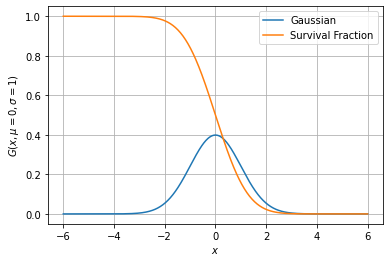

In [15]:
y_vals = stats.norm(loc=0, scale=1).pdf(x_vals)
y_sf = stats.norm(loc=0, scale=1).sf(x_vals)

plt.plot(x_vals, y_vals, label="Gaussian")
plt.plot(x_vals, y_sf, label="Survival Fraction")
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$G(x, \mu=0, \sigma=1)$')
plt.grid()
plt.show()

The survival fraction (a.k.a. the p-value) goes to zero pretty quickly once you get out past about 1-2 times the standard deviation.  That is just saying that there isn't really a lot of stuff out in the tails of the Gaussian distribution.

Let's switch to plotting the y-axis on a log scale to see what is going on out there.

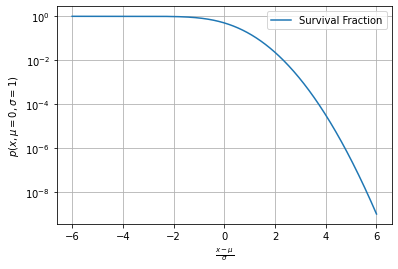

In [16]:
plt.yscale("log")
#plt.plot(x_vals, y_vals, label="Gaussian")
plt.plot(x_vals, y_sf, label="Survival Fraction")
plt.legend()
plt.xlabel(r'$\frac{x - \mu}{\sigma}$')
plt.ylabel(r'$p(x, \mu=0, \sigma=1)$')
plt.grid()
plt.show()

That plot show us that values around less than about $2 \sigma$ (note the use of the jargon in defining value in terms of $\sigma$) are pretty common, but once we get past $2 \sigma$, the odds of seeing a value out there if the data are truly random get to be very small very quickly.  The odds of seeing a fluctuation at the $6 \sigma$ level at about 1 in 10 to the 9th.  I.e., 1 in a billion.

Here's a handy plot showing the size of a residual, scaled in units of $\sigma$, that correspond to given p-values.

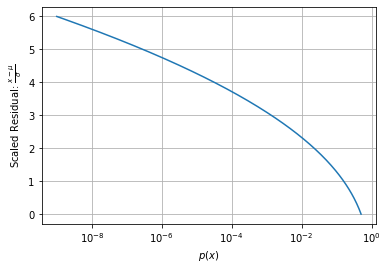

In [17]:
plt.xscale("log")
#plt.plot(x_vals, y_vals, label="Gaussian")
mask = x_vals >= 0
plt.plot(y_sf[mask], x_vals[mask])
plt.xlabel(r'$p(x)$')
plt.ylabel(r'Scaled Residual: $\frac{x-\mu}{\sigma}$')
plt.grid()
plt.show()

### Questions for discussion

#### 3.1 Different fields have different conventions for what constitutes a "statistically significant" result.  In many fields a p-value of $< 0.05$ is considered significant.  In other fields, the threshold is $5 \sigma$.  How much more unlikely is a $5 \sigma$ fluctuation that one with a p-value of 0.05?   Why do you think that different fields might use such different conventions?  (It is ok to guess...)

In [23]:
p_value_5_sigma = stats.norm().sf(5)
print(f"{0.05 / p_value_5_sigma} times more unlikely!")

174427.7893618949 times more unlikely!
